<h1> Welcome to the 2<sup>nd</sup> theory part for PE1!</h1>

You are probably used to looking at signals in the time domain. However, many information about a signal can be found in the frequency domain. It is therefore important that you are able to do a discrete Fourier Transform on your data points. Today you will learn how to do that using python.

In [2]:
# Installs some basic functions

%pylab inline
#from matplotlib import pyplot as plt
#import numpy as np

import numpy as np
import matplotlib.pyplot as plt

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


<h3> Complex numbers in python </h3>
When you do a discrete Fourier transform on datapoints with real values, a set of complex numbers can come out. Python can handle complex numbers in the following way:

In [ ]:

#The complex number i is given by a j in python
z = 3 + 4j
print("z = ", z)

#Get the real part of a complex number
a = np.real(z)
print("Re(z) = ", a)

#Get the imaginary part of a complex number
b = np.imag(z)
print("Im(z) = ", b)

#Get the magnitude of a complex number
r = np.abs(z)
print("|z| = ", r)

#Get the argument of a complex number in radians
phi = np.angle(z)
print("arg(z) = ", phi)


<h3> Fast Fourier Transform </h3>
In the lectures of PE1, you probably heard about the discrete Fourier Transform, with which you can fourier transform a discrete set of points. The problem with this fourier transform, is that the algorithm is computationally expensive for large datasets. Therefore, instead of working with a DFT, we will be using the fast Fourier Transform (FFT), which is an efficient algorithm which approximates the DFT. In the following cells, there will be a short introduction on how to use the FFT.

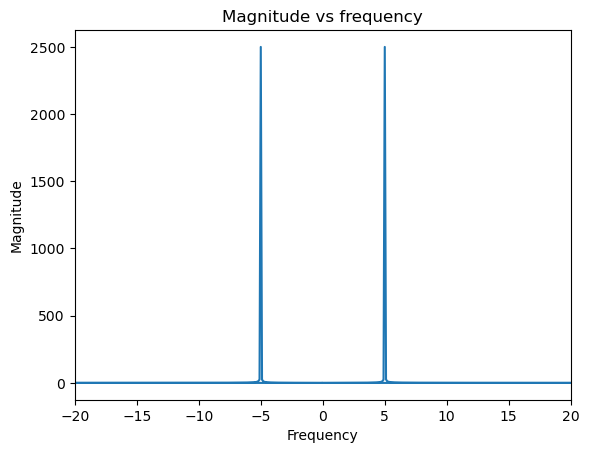

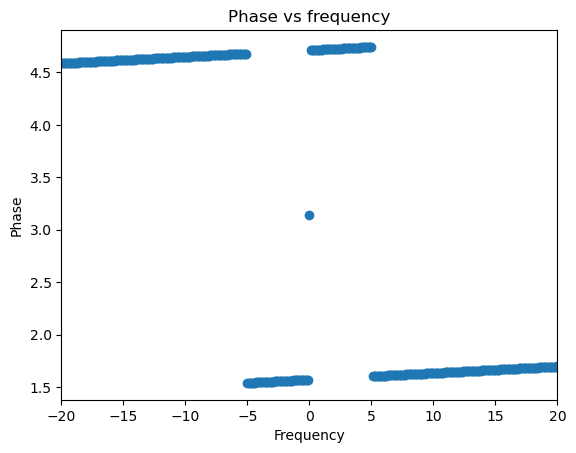

'\nTry to see if you can find the relation between the plots\nand the signal.\n'

In [3]:
#Define the rate and the amount of sample points
rate = 500
samples = 5000

#Create the time data array
t = np.linspace(0, samples/rate, samples)

#Artifically create a signal, in this case a sine wave
frequency = 5
signal = np.sin(2*np.pi * frequency * t)

"""
With the following functions you get the fast Fourier transform and 
the corresponding frequencies of a signal with a certain sample rate.
"""
#Get the fast Fourier transform by using the fft module in numpy
fft = np.fft.fft(signal)

#Get the corresponding frequencies
freqs = np.fft.fftfreq(len(signal), 1/rate)

"""
Remember that the DFT return complex numbers, so does the FFT. We can
however not easily plot a complex number against the frequency. Therefore,
We will be looking at two plots. One with the magnitude information, and
one with the phase information.
"""
plt.plot(freqs, np.abs(fft))
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Magnitude vs frequency")
plt.xlim(-20, 20)
plt.show()

"""
We want an angle between 0 and 2pi, therefore we take the angle modulo 
2pi. The points are also scattered instead of plotted. This is because
the points are not ordened. (You can try to plot the points to see 
what happens.)
"""
plt.scatter(freqs, np.mod(np.angle(fft), 2*np.pi))
plt.xlabel("Frequency")
plt.ylabel("Phase")
plt.title("Phase vs frequency")
plt.xlim(-20, 20)
plt.show()

"""
Try to see if you can find the relation between the plots
and the signal.
"""

<h3>Bode plots</h3>
In the case of a simple signal, such as one sine wave, it is sufficient to plot the magnitude, phase and frequency on a linear scale. In many signals however, we want to see the information distributed over multiple ordes of magnitude. In these cases, we want to use logarithmic scales. Such plots with logarithmic scales are called Bode plots.

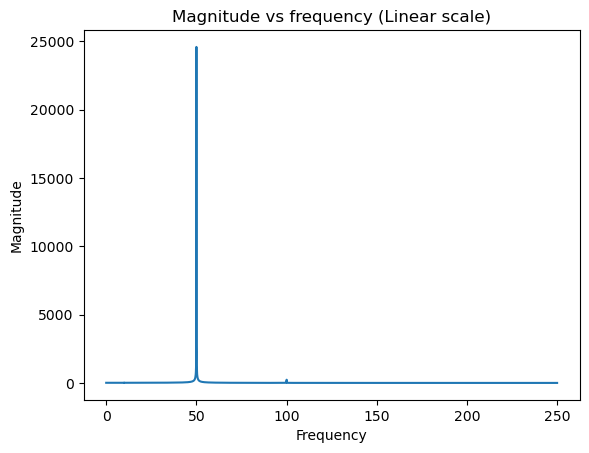

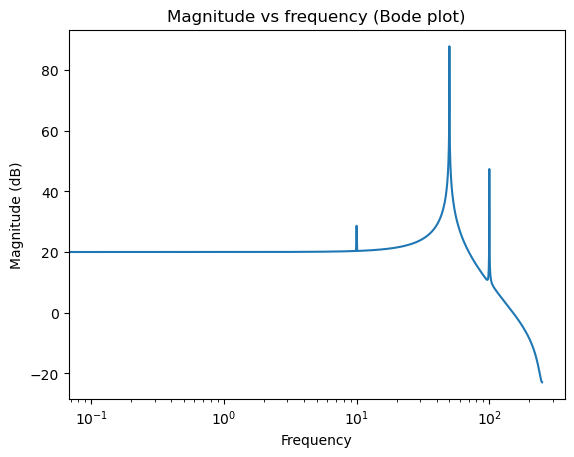

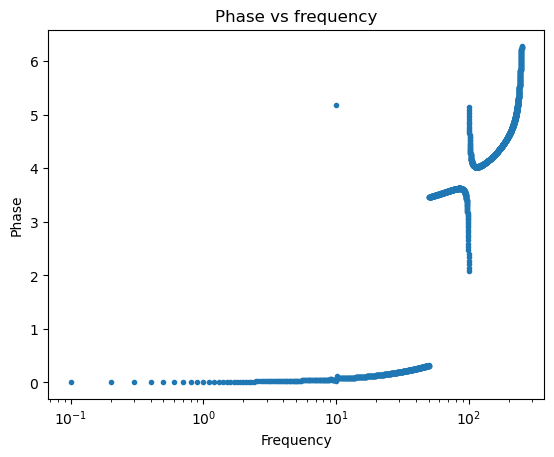

In [4]:
#Artifically create the following signal
signal2 = 0.01*np.sin(2*np.pi*10*t) + 0.1*np.sin(2*np.pi*100*t + 3) + 10*np.cos(2*np.pi*50*t)

#Fast fourier transform of signal
fft2 = np.fft.fft(signal2)
freqs2 = np.fft.fftfreq(len(signal2), 1/rate)

"""
We firstly only have to look at the values with positive frequencies
since the fourier transform is symmetric around the y-axis
"""
freqs2 = freqs2[:int(len(freqs2)/2)]
fft2 = fft2[:int(len(fft2)/2)]

#Now plot the magnitude and frequency on a linear scale
plt.plot(freqs2, np.abs(fft2))
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Magnitude vs frequency (Linear scale)")
plt.show()

#Plot the magnitude and frequency on a logarithmic scale
plt.semilogx(freqs2, 20*np.log10(np.abs(fft2)))
plt.xlabel("Frequency")
plt.ylabel("Magnitude (dB)")
plt.title("Magnitude vs frequency (Bode plot)")
plt.show()

"""
In which plot can you see the most information about the signal?
"""

#We will do the same with the phase information
plt.semilogx(freqs2, np.mod(np.angle(fft2), 2*np.pi), '.')
plt.xlabel("Frequency")
plt.ylabel("Phase")
plt.title("Phase vs frequency")
plt.show()

In [ ]:
#You can easily save and load numpy arrays using the numpy functions 'load' and 'save'
data = np.array([3,4,5,6,7,8,9,0])
np.save(file="data.npy", arr = data)

read = np.load("data.npy")
print("The following array was read from \"data.npy\" :"+ str(read)+ "\n")

#Getting the indices of the peaks of the fft using argrelextrema:
from scipy.signal import argrelextrema

"""
Argrelextrema takes the array, a comparitor (np.greater to find peaks or np.less for lows)
and an order. You can play around with the order to find out what it does.
""" 

#Get the indices of the peaks
peak_indices = argrelextrema(fft2, np.greater, order=100)[0]
print("argrelextrema found peaks at indices: " + str(peak_indices))

<h3>Inverse Fast Fourier Transform </h3>
Sometimes, we want to fourier transform a signal, modify this signal in the frequency domain and then convert the signal back to the time domain. This can be done using a inverse Fast Fourier Transform.

c:\Users\Damianko\anaconda3\Lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


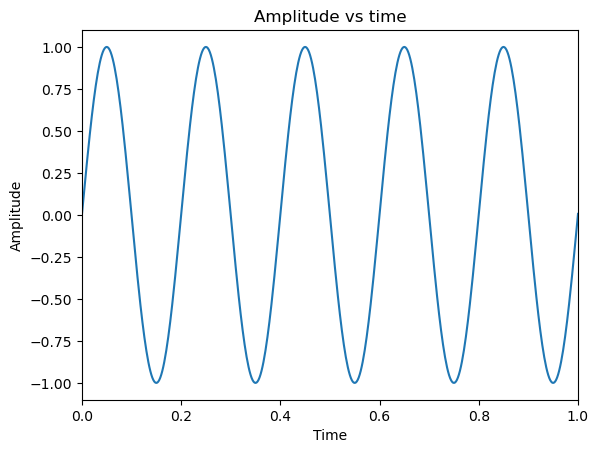

In [5]:
#We will do an inverse FFT on the fourier transform of our first signal
#using the fft module in numpy
signal = np.fft.ifft(fft)

plt.plot(t, signal)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Amplitude vs time')
plt.xlim(0,1)
plt.show()